# Classifying Hot 100 Songs using a subsample of the Kaggle/Spotify Dataset
In this notebook, we use the subsample of the Kaggle/Spotify dataset we created in the __Spotify-Kaggle Dataset Clean__ notebook and build a simple classifier (using either KNN or Random Forests) that classifies whether or not a song is part of the Billboard Hot 100s. Let us first load the respective packages and the datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploring the data
We will first load in the following datasets:
- `tracks_hot100.csv` - This dataset contains a list of songs that appeared on the billboard hot 100 year end lists from 2010 to 2020.
- `tracks_not100_sub.csv` - This dataset contains a randomly selected sample of songs that were not part of the Hot 100s.

Both of these datasets contain the same features as we will see below.

In [2]:
hot100 = pd.read_csv('tracks_hot100.csv')
not100 = pd.read_csv('tracks_not100_sub.csv')

# Printing information about the datasets
print("Hot 100's Data Info")
print(hot100.info())
print()
print("Not 100's Data Info")
print(not100.info())

Hot 100's Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                796 non-null    object 
 1   name              796 non-null    object 
 2   popularity        796 non-null    int64  
 3   duration_ms       796 non-null    int64  
 4   explicit          796 non-null    int64  
 5   artists           796 non-null    object 
 6   id_artists        796 non-null    object 
 7   release_date      796 non-null    object 
 8   danceability      796 non-null    float64
 9   energy            796 non-null    float64
 10  key               796 non-null    int64  
 11  loudness          796 non-null    float64
 12  mode              796 non-null    int64  
 13  speechiness       796 non-null    float64
 14  acousticness      796 non-null    float64
 15  instrumentalness  796 non-null    float64
 16  liveness          796 no

Let's take a closer look at the kind of variables both of these datasets contain by analyzing the Head

In [3]:
print("Hot 100's Head")
hot100.head()

Hot 100's Head


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,main_artist,duration_min,hot100
0,02XnQdf7sipaKBBHixz3Zp,Paparazzi,72,208307,0,['Lady Gaga'],['1HY2Jd0NmPuamShAr6KMms'],2008-01-01,0.762,0.692,...,0.0438,0.11300,0.000000,0.0940,0.397,114.906,4,Lady Gaga,3.471783,True
1,285hMzLhJwHVLe9QT9qilk,Breakeven,74,261427,0,['The Script'],['3AQRLZ9PuTAozP28Skbq8V'],2008-07-14,0.630,0.696,...,0.0242,0.14400,0.000000,0.0835,0.491,94.034,4,The Script,4.357117,True
2,5VGlqQANWDKJFl0MBG3sg2,Use Somebody,77,230760,0,['Kings of Leon'],['2qk9voo8llSGYcZ6xrBzKx'],2008-09-23,0.276,0.715,...,0.0432,0.00552,0.000417,0.2010,0.173,137.028,4,Kings of Leon,3.846000,True
3,1GEBsLDvJGw7kviySRI6GX,You Belong With Me,74,232120,0,['Taylor Swift'],['06HL4z0CvFAxyc27GXpf02'],2008-11-11,0.687,0.745,...,0.0379,0.17800,0.000016,0.1110,0.435,129.966,4,Taylor Swift,3.868667,True
4,6A5NlmBCsCGbJ27jHQgKV5,Do You Remember,50,210800,0,"['Jay Sean', 'Sean Paul', 'Lil Jon']","['4pADjHPWyrlAF0FA7joK2H', '3Isy6kedDrgPYoTS1d...",2009-01-01,0.854,0.674,...,0.0705,0.02040,0.000000,0.1010,0.818,125.845,4,Jay Sean,3.513333,True


In [4]:
del not100['Unnamed: 0']
print("Not 100 Head")
not100.head()

Not 100 Head


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,main_artist,duration_min,hot100
0,6GQLX6Z28fYwDNCrhaKzYF,Undercover Martyn,68,166573,0,['Two Door Cinema Club'],['536BYVgOnRky0xjsPT96zl'],2010-03-01,0.446,0.871,...,0.1160,0.000252,0.000008,0.0996,0.612,159.863,4,Two Door Cinema Club,2.776217,False
1,6O4QbnxKqUCJMIGJe6rTaN,"Pirouette, cacahouète",44,171147,0,['Chansons Et Comptines'],['4rsK66w6MjGtwI5QnhFt0P'],2010-03-21,0.783,0.619,...,0.0286,0.492000,0.000000,0.0613,0.769,140.130,4,Chansons Et Comptines,2.852450,False
2,04J24gXLrUEYyNmmoJMLNa,Make A Circuit Me,0,176427,0,['The Polecats'],['0ySLj2XiEOFtixInK1GAD4'],2010-12-21,0.353,0.953,...,0.2070,0.000397,0.076300,0.1810,0.545,188.355,4,The Polecats,2.940450,False
3,1PdnoVxzvexOoLkOaTq7KX,Poupata,29,214427,0,"['Michal David', 'Kroky Frantiska Janecka']","['6rA1HqwDyDDRcq6WHTwr2G', '2wMHvKKOWjwp77Qghe...",2010-06-30,0.580,0.694,...,0.0397,0.080400,0.000000,0.0903,0.887,139.607,4,Michal David,3.573783,False
4,3DOOQAScRTa3oTszGN3XZg,Todo vuelve a su lugar,48,299973,0,"['Fidel Nadal', 'I Nesta']","['7l2wptrNdI4wEHxTlWa6SS', '2LraTaRLVho6BWao5J...",2010-11-08,0.624,0.892,...,0.0622,0.112000,0.000000,0.0816,0.777,77.974,4,Fidel Nadal,4.999550,False


Let's append these datasets together!

In [5]:
tracks = hot100.append(not100, ignore_index=True)
print(tracks.info())
tracks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896 entries, 0 to 1895
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1896 non-null   object 
 1   name              1896 non-null   object 
 2   popularity        1896 non-null   int64  
 3   duration_ms       1896 non-null   int64  
 4   explicit          1896 non-null   int64  
 5   artists           1896 non-null   object 
 6   id_artists        1896 non-null   object 
 7   release_date      1896 non-null   object 
 8   danceability      1896 non-null   float64
 9   energy            1896 non-null   float64
 10  key               1896 non-null   int64  
 11  loudness          1896 non-null   float64
 12  mode              1896 non-null   int64  
 13  speechiness       1896 non-null   float64
 14  acousticness      1896 non-null   float64
 15  instrumentalness  1896 non-null   float64
 16  liveness          1896 non-null   float64


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,main_artist,duration_min,hot100
0,02XnQdf7sipaKBBHixz3Zp,Paparazzi,72,208307,0,['Lady Gaga'],['1HY2Jd0NmPuamShAr6KMms'],2008-01-01,0.762,0.692,...,0.0438,0.11300,0.000000,0.0940,0.397,114.906,4,Lady Gaga,3.471783,True
1,285hMzLhJwHVLe9QT9qilk,Breakeven,74,261427,0,['The Script'],['3AQRLZ9PuTAozP28Skbq8V'],2008-07-14,0.630,0.696,...,0.0242,0.14400,0.000000,0.0835,0.491,94.034,4,The Script,4.357117,True
2,5VGlqQANWDKJFl0MBG3sg2,Use Somebody,77,230760,0,['Kings of Leon'],['2qk9voo8llSGYcZ6xrBzKx'],2008-09-23,0.276,0.715,...,0.0432,0.00552,0.000417,0.2010,0.173,137.028,4,Kings of Leon,3.846000,True
3,1GEBsLDvJGw7kviySRI6GX,You Belong With Me,74,232120,0,['Taylor Swift'],['06HL4z0CvFAxyc27GXpf02'],2008-11-11,0.687,0.745,...,0.0379,0.17800,0.000016,0.1110,0.435,129.966,4,Taylor Swift,3.868667,True
4,6A5NlmBCsCGbJ27jHQgKV5,Do You Remember,50,210800,0,"['Jay Sean', 'Sean Paul', 'Lil Jon']","['4pADjHPWyrlAF0FA7joK2H', '3Isy6kedDrgPYoTS1d...",2009-01-01,0.854,0.674,...,0.0705,0.02040,0.000000,0.1010,0.818,125.845,4,Jay Sean,3.513333,True


We see that the classification of a title being a Hot 100 title is given in the `hot100` column and is set as a Boolean value. Let's first convert that to an integer for classification purposes.

In [6]:
tracks['hot100'] = tracks['hot100'].astype(int)
tracks['hot100'].head()

0    1
1    1
2    1
3    1
4    1
Name: hot100, dtype: int32

We investigate whether certain sonic features are useful in classifying songs between Hot 100s and Not 100s.

### Exploring the Features
The features we are most interested in are:
- Explicit: Whether or not a song has explicit content
- Danceability: A measure (from 0 to 1) of a song's danceability with 1 being most danceable
- Energy: A measure (from 0 to 1) of a song's intensity and activity
- Loudness: Overall loudness of a song in dB
- Speechiness: The presence of words in a track (closer to 1 means more spoken words)
- Instrumentalness: Measure of lack of vocals
- Acousticness: The degree of acousticness in a track
- Tempo: Overall Estimated Tempo of a track (in BPM)
- Valence: Measure of musical positiveness in a track
- Time Signature: Estimated overall time signature of a track
- Duration in Minutes

A majority of these features are explained [here](https://developer.spotify.com/documentation/web-api/reference/#objects-index).

Let's first look at how these features compare across Hot100 and Not100 songs by means of histograms!

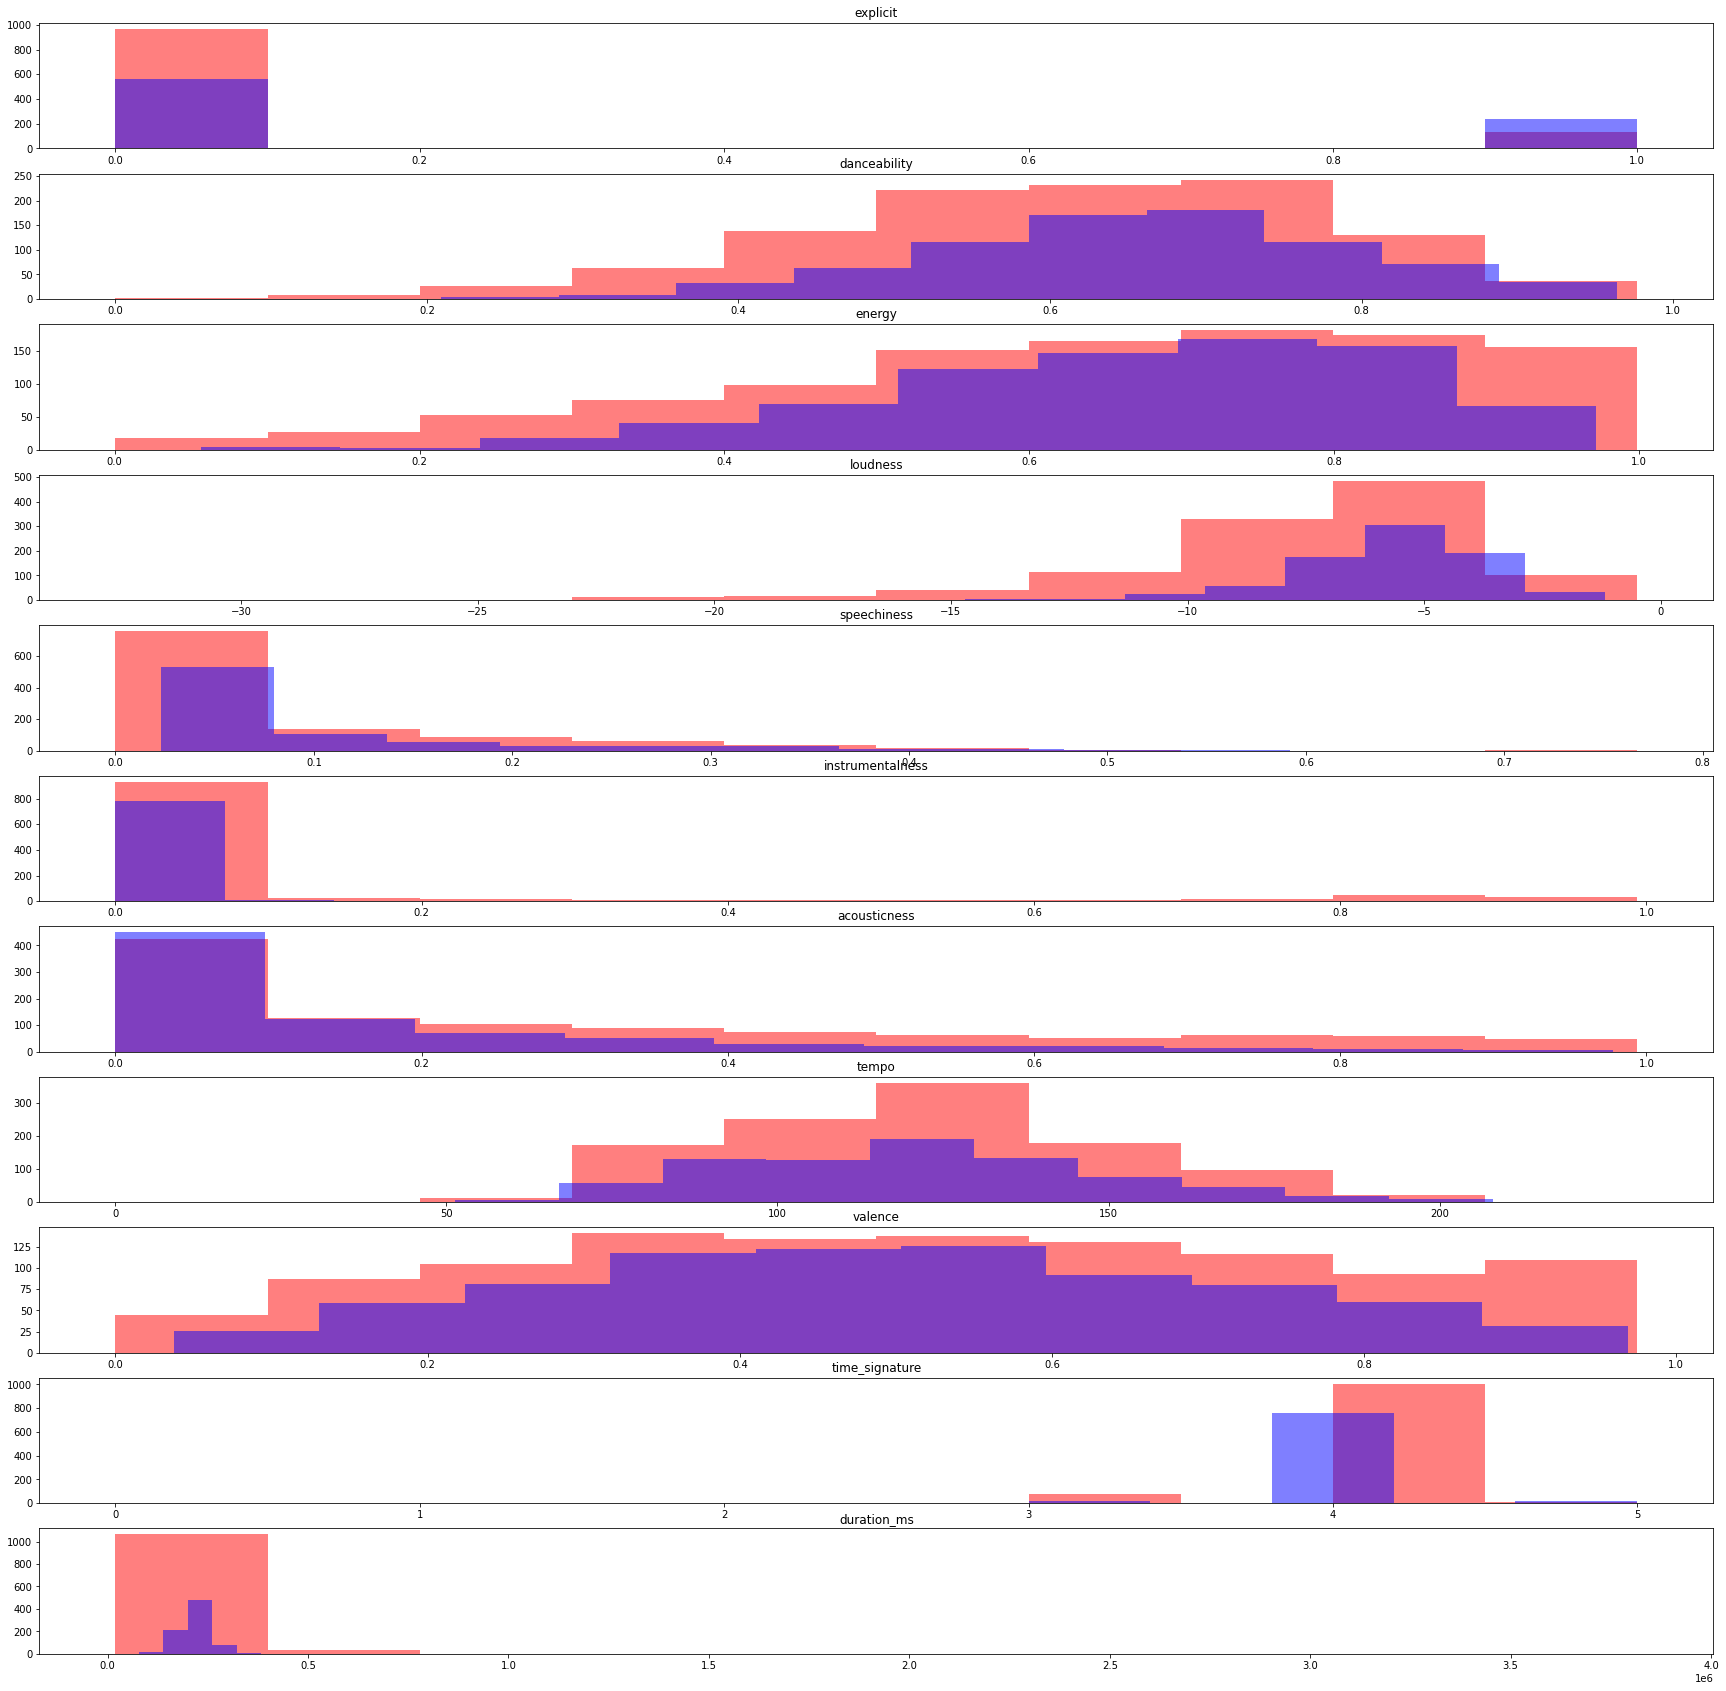

In [7]:
# List of all features
features = ['explicit','danceability','energy','loudness','speechiness','instrumentalness','acousticness','tempo','valence','time_signature','duration_ms']

# Making the boxplot
# tracks.boxplot(column=features, by='hot100',layout=(4,3), figsize=(10,10), sharey=False)
fig, ax = plt.subplots(len(features),1, figsize = (30, 30))
for i in range(len(features)):
    data0 = tracks.loc[tracks['hot100'] == 0, features[i]]
    data1 = tracks.loc[tracks['hot100'] == 1, features[i]]
    ax[i].hist(data0, label = 'Not', color='red', alpha = 0.5)
    ax[i].hist(data1, label = 'Hot', color='blue', alpha = 0.5)
    ax[i].set_title(features[i])

plt.show()

### Classification with KNN
Let's try and build a KNN classifier. To do this, we are going to be focusing on two things:
- Firstly, we are going to tune the number of neighbors (from a range of 1 to 10).
- Secondly, for each number of neighbors, we will go over each possible subset of features.

To find the best performing model, we will look at the highest possible accuracy score over the training data using simple cross validation - we will then measure the accuracy over the testing data. The testing data will be a random sample of 25\% of the data. We will use 5 fold cross validation and stratify on the response variable `hot100`.

In [8]:
# Importing all the necessary modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.base import clone

We first put down some useful functions that have been taken from the bootcamp.

In [9]:
## This gets our data for us
def get_X_y(df,features,target):
    # Returns X then y
    return np.array(df[features]), np.array(df[target])

# This function was modified from stackexchange user hughdbrown 
# at this link, 
# https://stackoverflow.com/questions/1482308/how-to-get-all-subsets-of-a-set-powerset

# This returns the power set of a set minus the empty set
def powerset_no_empty(s):
    power_set = []
    x = len(s)
    for i in range(1 << x):
        power_set.append([s[j] for j in range(x) if (i & (1 << j))])
            
    return power_set[1:]

Let's first set aside our train and test data

In [10]:
tracks_copy = tracks.copy()
tracks_train, tracks_test = train_test_split(tracks_copy, test_size=0.25, shuffle=True, random_state=42, stratify = tracks_copy.hot100)

Now lets build a large cross-validation loop that does everything for us!

In [11]:
# Getting the powerset of features
features_combo = powerset_no_empty(features)

# Creating the empty arrays for max neighbors
max_neighbors = 10
# Number of neighbors
neighbors = np.arange(1, max_neighbors+1, 1)
# Arrays for best CV accuracies
neighbors_acc = np.empty((max_neighbors, 1))
# Array for best CV features (index for features_combo)
neighbors_feature = np.empty((max_neighbors, 1))

# Building the loop
for k in range(max_neighbors):
    print("Model with ", k+1, " Neighbors")
    # Creating the necessary objects
    # KNN object
    knn = KNeighborsClassifier(n_neighbors = k+1)
    
    # Kfold object
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state = 614)
    
    # Accuracies for cross validation loops for all possible combinations
    ACC = np.empty((5,len(features_combo)))
    
    # Initializing data
    X_train, y_train = get_X_y(tracks_train, features_combo[0], 'hot100')
    
    # Initializing inner loop
    i = 0
    
    # Cross Validation Loop
    for train_index, test_index in kfold.split(X_train,y_train):
        # For each possible set of features
        for j in range(len(features_combo)):
            # Getting X and y
            X_train, y_train = get_X_y(tracks_train, features_combo[j], 'hot100')
            
            # CV splits
            X_cv_train, X_cv_test = X_train[train_index], X_train[test_index]
            y_cv_train, y_cv_test = y_train[train_index], y_train[test_index]
            
            # Cloning KNN object
            knn_clone = clone(knn)
            
            # Fitting the model
            knn_clone.fit(X_cv_train, y_cv_train)
            
            # Getting accuracy
            ACC[i, j] = np.round(accuracy_score(y_cv_test, knn_clone.predict(X_cv_test)), 4)
        
        # Moving on to next split
        i += 1
    
    # Getting the features that had the maximum CV accuracies
    neighbors_acc[k] = np.max(np.mean(ACC, axis=0))
    neighbors_feature = np.argmax(np.mean(ACC, axis = 0))
    
    # Printing the statement
    print("The model with the highest mean CV accuracy was one with ", 
          features_combo[np.argmax(np.mean(ACC, axis=0))],
         " as the features with mean accuracy of ", np.max(np.mean(ACC, axis=0)))

Model with  1  Neighbors
The model with the highest mean CV accuracy was one with  ['explicit', 'energy', 'loudness', 'instrumentalness', 'acousticness']  as the features with mean accuracy of  0.65472
Model with  2  Neighbors
The model with the highest mean CV accuracy was one with  ['energy', 'loudness', 'instrumentalness', 'acousticness']  as the features with mean accuracy of  0.6603600000000001
Model with  3  Neighbors
The model with the highest mean CV accuracy was one with  ['explicit', 'danceability', 'energy', 'speechiness', 'instrumentalness', 'acousticness', 'valence', 'time_signature']  as the features with mean accuracy of  0.6624399999999999
Model with  4  Neighbors
The model with the highest mean CV accuracy was one with  ['explicit', 'energy', 'loudness', 'instrumentalness', 'acousticness']  as the features with mean accuracy of  0.6723199999999999
Model with  5  Neighbors
The model with the highest mean CV accuracy was one with  ['explicit', 'energy', 'speechiness', 'i

Looks like the model that has the highest CV accuracy is one with 10 neighbors and `['explicit', 'danceability', 'energy', 'instrumentalness', 'acousticness', 'time_signature', 'duration_min']` as the features. Let's try this model on the testing data!

In [12]:
best_feat = ['explicit', 'danceability', 'energy', 'instrumentalness', 'acousticness', 'time_signature', 'duration_min']
knn_best = KNeighborsClassifier(n_neighbors = 10)
X_train, y_train = get_X_y(tracks_train, best_feat, 'hot100')
X_test, y_test = get_X_y(tracks_test, best_feat, 'hot100')

knn_best.fit(X_train, y_train)

print("Testing Accuracy for the best model with 10 neighbors best features is", accuracy_score(y_test, knn_best.predict(X_test)))

Testing Accuracy for the best model with 10 neighbors best features is 0.6877637130801688


So we get around 70% training accuracy and 69% testing accuracy - could be worse!

### Decision Tree Classifier
Let's try and build a Decision Tree Classifier. For this, we will focus on tuning the maximum depth of each tree and varying the set of features just like before! Let's first import the Decision Tree Classifier from sklearn and follow the same steps as above! We will focus on depths from 2 to 20 in steps of 2.

In [13]:
from sklearn.tree import DecisionTreeClassifier

Now let's build the loop!

In [14]:
# Creating the empty arrays for max depth
depths = np.arange(2, 21, 2)
# Arrays for best CV accuracies
depth_acc = np.empty((len(depths), 1))
# Array for best CV features (index for features_combo)
depth_feature = np.empty((len(depths), 1))

# Building the loop
for k in range(len(depths)):
    print("Model with Max Depth", depths[k])
    # Creating the necessary objects
    # DTree object
    tree = DecisionTreeClassifier(max_depth = depths[k])
    
    # Kfold object
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state = 614)
    
    # Accuracies for cross validation loops for all possible combinations
    ACC = np.empty((5,len(features_combo)))
    
    # Initializing data
    X_train, y_train = get_X_y(tracks_train, features_combo[0], 'hot100')
    
    # Initializing inner loop
    i = 0
    
    # Cross Validation Loop
    for train_index, test_index in kfold.split(X_train,y_train):
        # For each possible set of features
        for j in range(len(features_combo)):
            # Getting X and y
            X_train, y_train = get_X_y(tracks_train, features_combo[j], 'hot100')
            
            # CV splits
            X_cv_train, X_cv_test = X_train[train_index], X_train[test_index]
            y_cv_train, y_cv_test = y_train[train_index], y_train[test_index]
            
            # Cloning KNN object
            tree_clone = clone(tree)
            
            # Fitting the model
            tree_clone.fit(X_cv_train, y_cv_train)
            
            # Getting accuracy
            ACC[i, j] = np.round(accuracy_score(y_cv_test, tree_clone.predict(X_cv_test)), 4)
        
        # Moving on to next split
        i += 1
    
    # Getting the features that had the maximum CV accuracies
    depth_acc[k] = np.max(np.mean(ACC, axis=0))
    depth_feature = np.argmax(np.mean(ACC, axis = 0))
    
    # Printing the statement
    print("The model with the highest mean CV accuracy was one with ", 
          features_combo[np.argmax(np.mean(ACC, axis=0))],
         " as the features with mean accuracy of ", np.max(np.mean(ACC, axis=0)))

Model with Max Depth 2
The model with the highest mean CV accuracy was one with  ['explicit', 'speechiness', 'instrumentalness']  as the features with mean accuracy of  0.6385400000000001
Model with Max Depth 4
The model with the highest mean CV accuracy was one with  ['explicit', 'energy', 'loudness', 'speechiness', 'instrumentalness', 'acousticness']  as the features with mean accuracy of  0.6772400000000001
Model with Max Depth 6
The model with the highest mean CV accuracy was one with  ['explicit', 'speechiness', 'acousticness', 'tempo', 'time_signature', 'duration_ms']  as the features with mean accuracy of  0.68284
Model with Max Depth 8
The model with the highest mean CV accuracy was one with  ['explicit', 'danceability', 'energy', 'loudness', 'instrumentalness', 'valence', 'duration_ms']  as the features with mean accuracy of  0.6856399999999999
Model with Max Depth 10
The model with the highest mean CV accuracy was one with  ['explicit', 'danceability', 'energy', 'loudness', '

The best model appears to be one with max depth of 6 and features `['explicit', 'speechiness', 'acousticness', 'tempo', 'duration_min']` resulting in an average CV accuracy of 68.5%

### Playing around with Random Forests
The next step is to see what kind of predictions we can get with Random Forest Classifiers. Like before, we focus on max depth again as our main hyperparameter of interest. We move from a depth of 2 to 20 in increments of 2. We focus on 50 estimators.

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Creating the empty arrays for max depth
depths = np.arange(2, 21, 2)
# Arrays for best CV accuracies
depth_acc = np.empty((len(depths), 1))
# Array for best CV features (index for features_combo)
depth_feature = np.empty((len(depths), 1))

# Building the loop
for k in range(len(depths)):
    print("Model with Max Depth", depths[k])
    # Creating the necessary objects
    # DTree object
    rf = RandomForestClassifier(max_depth = depths[k], n_estimators=50, random_state=42)
    
    # Kfold object
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state = 614)
    
    # Accuracies for cross validation loops for all possible combinations
    ACC = np.empty((5,len(features_combo)))
    
    # Initializing data
    X_train, y_train = get_X_y(tracks_train, features_combo[0], 'hot100')
    
    # Initializing inner loop
    i = 0
    
    # Cross Validation Loop
    for train_index, test_index in kfold.split(X_train,y_train):
        # For each possible set of features
        for j in range(len(features_combo)):
            # Getting X and y
            X_train, y_train = get_X_y(tracks_train, features_combo[j], 'hot100')
            
            # CV splits
            X_cv_train, X_cv_test = X_train[train_index], X_train[test_index]
            y_cv_train, y_cv_test = y_train[train_index], y_train[test_index]
            
            # Cloning KNN object
            rf_clone = clone(rf)
            
            # Fitting the model
            rf_clone.fit(X_cv_train, y_cv_train)
            
            # Getting accuracy
            ACC[i, j] = np.round(accuracy_score(y_cv_test, rf_clone.predict(X_cv_test)), 4)
        
        # Moving on to next split
        i += 1
    
    # Getting the features that had the maximum CV accuracies
    depth_acc[k] = np.max(np.mean(ACC, axis=0))
    depth_feature = np.argmax(np.mean(ACC, axis = 0))
    
    # Printing the statement
    print("The model with the highest mean CV accuracy was one with ", 
          features_combo[np.argmax(np.mean(ACC, axis=0))],
         " as the features with mean accuracy of ", np.max(np.mean(ACC, axis=0)))

Model with Max Depth 2


KeyboardInterrupt: 